In [ ]:
# Import data
import pandas as pd

# Load the dataset, I a using google colab to code
df = pd.read_csv("/content/sample_data/crime_dataset.csv")

Step 1: Start Data cleaning

In [ ]:
#identify and handle missing values
missing = df.isnull().sum()
print("Missing values in each column:\n")
print(missing[missing > 0])

Missing values in each column:

modus_operandi          28929
victim_age               4062
victim_gender           27729
victim_ethnicity        27731
premise_code                3
premise_description        92
weapon_code            131843
crime_code_1                2
crime_code_2           187239
crime_code_3           202560
crime_code_4           203071
cross_street           167414
dtype: int64


In [ ]:
# Fill missing categorical values with 'Unknown'
df.fillna(value={
    "cross_street": "Unknown",
    "premise_description": "Unknown",
    "victim_gender": "Unknown",
    "victim_ethnicity": "Unknown"

}, inplace=True)

# fill missing value with 0 as we cannot remove all since we have so many missing values
df.fillna(value={
    "weapon_code": 0,
    "modus_operandi": 0,
    "victim_age": 0,
    "premise_code": 0,
    "crime_code_1": 0,
    "crime_code_2": 0,
    "crime_code_3": 0,
    "crime_code_4": 0
}, inplace=True)

In [ ]:
# Remove or review duplicates
# Check for duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [ ]:
# Check for inconsistencies in victim gender
print("Unique values in Vict Sex:", df["victim_gender"].unique())

# Check in case status
print("Unique values in Case solved:", df["case_solved"].unique())

# Check in victim ethnicity
print("Unique values in victim ethnicity:", df["victim_ethnicity"].unique())


Unique values in Vict Sex: ['M' 'Unknown' 'Male' 'F' 'X' 'Female' 'H']
Unique values in Case solved: ['Not solved' 'Solved']
Unique values in victim ethnicity: ['W' 'Unknown' 'H' 'O' 'B' 'X' 'A' 'K' 'C' 'I' 'F' 'Rare' 'V' 'J' 'Z']


In [ ]:
# Standardize victim gender values
df["victim_gender"] = df["victim_gender"].replace({
    "M": "Male",
    "F": "Female",
    "X": "Unknown",
    "H": "Homosexual"  # 'H' is homosexual(source: Google)
})

# Confirm changes
print("Cleaned values in victim_gender:", df["victim_gender"].unique())


Cleaned values in victim_gender: ['Male' 'Unknown' 'Female' 'Homosexual']


In [ ]:
# Standardize victim_ethnicity values
ethnicity_map = {
    "W": "White",
    "B": "Black",
    "H": "Hispanic",
    "A": "Asian",
    "C": "Chinese",
    "I": "American Indian",
    "K": "Korean",
    "J": "Japanese",
    "V": "Vietnamese",
    "Z": "Other Asian",
    "F": "Filipino",
    "O": "Other",
    "X": "Unknown",
    "0": "Unknown",
    "Rare": "Rare",
    "Unknown": "Unknown"
}

df["victim_ethnicity"] = df["victim_ethnicity"].replace(ethnicity_map)

# cleaned value check
print("Cleaned values in victim_ethnicity:", df["victim_ethnicity"].unique())


Cleaned values in victim_ethnicity: ['White' 'Unknown' 'Hispanic' 'Other' 'Black' 'Asian' 'Korean' 'Chinese'
 'American Indian' 'Filipino' 'Rare' 'Vietnamese' 'Japanese' 'Other Asian']


In [ ]:
# Checking ethnicity values
print(df.victim_ethnicity)
# Checking crime code datatype
print(type(df.crime_code_1))

0            White
1          Unknown
2          Unknown
3            White
4          Unknown
            ...   
203084       Black
203085    Hispanic
203086     Unknown
203087    Hispanic
203088     Unknown
Name: victim_ethnicity, Length: 203089, dtype: object
<class 'pandas.core.series.Series'>


Step 2: Exploratory Data Analysis

In [ ]:
# Save cleaned dataset to a file name cleaned_crime_dataset
df.to_csv("/content/sample_data/cleaned_crime_dataset.csv", index=False)

In [ ]:
# Load lookup files
crime_lookup = pd.read_csv("/content/sample_data/crime_types.csv")
weapon_lookup = pd.read_csv("/content/sample_data/weapon_types.csv")

# check the lookup the files
print("Crime lookup:\n", crime_lookup.head())
print("Weapon lookup:\n", weapon_lookup.head())

Crime lookup:
    crime_code                                crime_description
0         480                                    BIKE - STOLEN
1         510                                 VEHICLE - STOLEN
2         350                                    THEFT, PERSON
3         440               THEFT PLAIN - PETTY ($950 & UNDER)
4         420  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
Weapon lookup:
    weapon_code                              weapon_description
0          400  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1          500                     UNKNOWN WEAPON/OTHER WEAPON
2          102                                        HAND GUN
3          201        KNIFE WITH BLADE OVER 6 INCHES IN LENGTH
4          107                                   OTHER FIREARM


In [ ]:
# Summary statistics for numeric columns
print(df.describe())
print(crime_lookup.describe())
print(weapon_lookup.describe())

       division_number           area  reporting_district           part  \
count     2.030890e+05  203089.000000       203089.000000  203089.000000   
mean      2.111349e+08      10.751075         1121.524189       1.405118   
std       1.048451e+06       6.061707          606.272483       0.490916   
min       2.113000e+03       1.000000          101.000000       1.000000   
25%       2.106060e+08       6.000000          628.000000       1.000000   
50%       2.111112e+08      11.000000         1144.000000       1.000000   
75%       2.116065e+08      16.000000         1612.000000       2.000000   
max       2.315056e+08      21.000000         2199.000000       2.000000   

          crime_code     victim_age   premise_code    weapon_code  \
count  203089.000000  203089.000000  203089.000000  203089.000000   
mean      504.364879      29.364249     297.401873     125.917179   
std       209.716701      21.840480     216.206825     186.755532   
min       110.000000       0.000000    

In [ ]:
# Summary of categorical variables (top value, frequency, unique count)
print("-----crime dataset features-----")
print(df.describe(include='object'))
print("------crime type features------")
print(crime_lookup.describe(include='object'))
print("------weapon type features------")
print(weapon_lookup.describe(include='object'))

-----crime dataset features-----
       date_reported        date_occurred area_name  modus_operandi  \
count         203089               203089    203089          203089   
unique           365                73266        21           79560   
top       2021-11-01  2021-03-01 12:00:00   Central               0   
freq             745                   79     12806           28929   

       victim_gender victim_ethnicity premise_description  \
count         203089           203089              203089   
unique             4               14                 292   
top             Male         Hispanic              STREET   
freq           85496            61719               53114   

                                      location cross_street case_solved  
count                                   203089       203089      203089  
unique                                   41306         5589           2  
top     800 N  ALAMEDA                      ST      Unknown  Not solved  
freq     

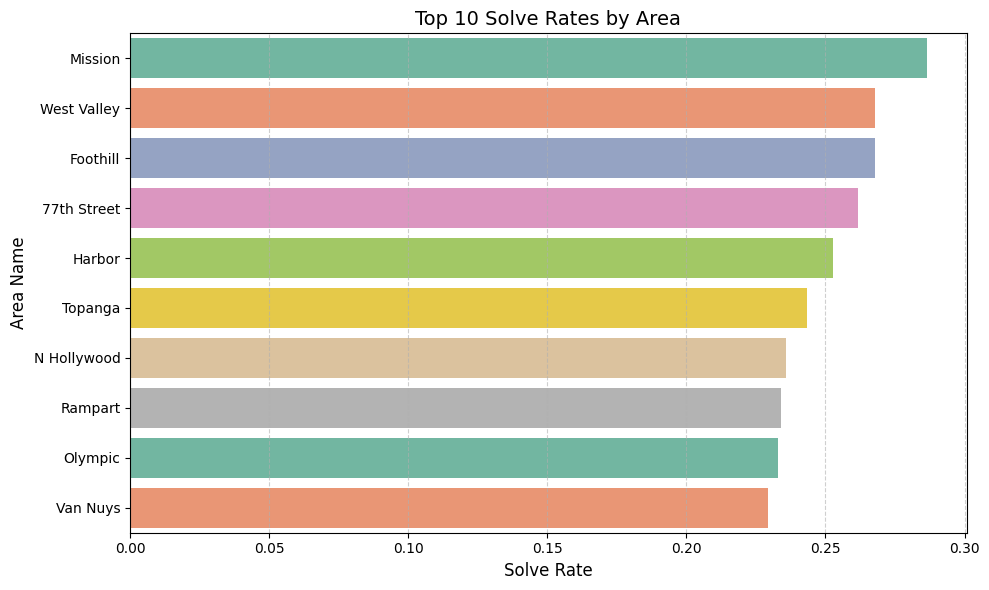

In [ ]:
# Import libraries to show graphs and visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Merge lookup tables
df = df.merge(crime_lookup, how='left', left_on='crime_code', right_on='crime_code')
df = df.merge(weapon_lookup, how='left', left_on='weapon_code', right_on='weapon_code')

# Encode case_solved as binary
df['solved'] = df['case_solved'].map({'Solved': 1, 'Not solved': 0})

# Top 10 Solve Rates by Area chart
plt.figure(figsize=(10, 6))
area_solve_rate = df.groupby('area_name')['solved'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=area_solve_rate.values, y=area_solve_rate.index, hue=area_solve_rate.index, palette="Set2")
plt.title("Top 10 Solve Rates by Area", fontsize=14)
plt.xlabel("Solve Rate", fontsize=12)
plt.ylabel("Area Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

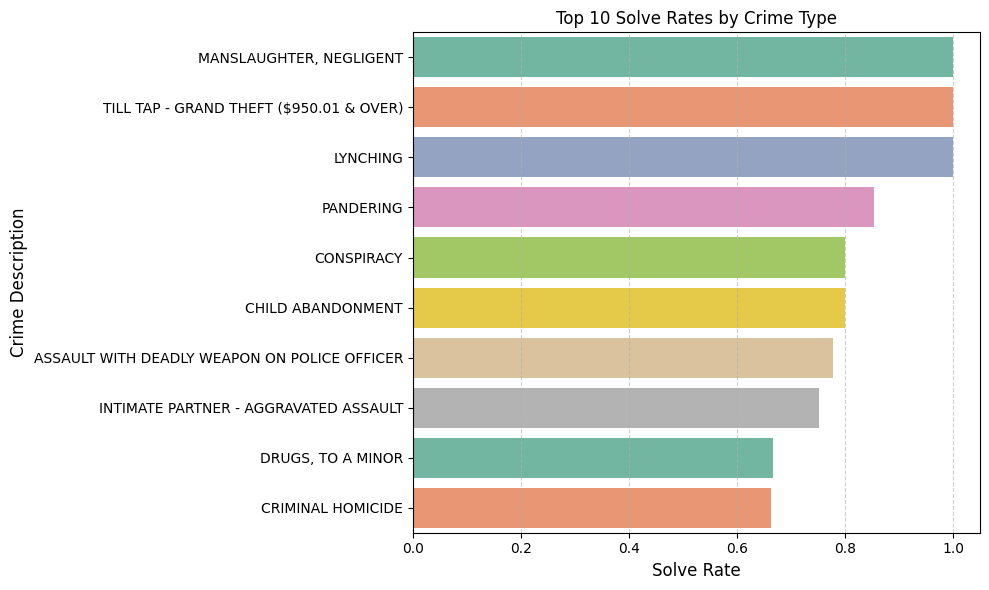

In [ ]:
# Solve rate by crime type chart
plt.figure(figsize=(10, 6))
crime_solve_rate = df.groupby('crime_description')['solved'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=crime_solve_rate.values, y=crime_solve_rate.index,hue=crime_solve_rate.index, palette="Set2")
plt.title("Top 10 Solve Rates by Crime Type")
plt.xlabel("Solve Rate", fontsize=12)
plt.ylabel("Crime Description", fontsize=12)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

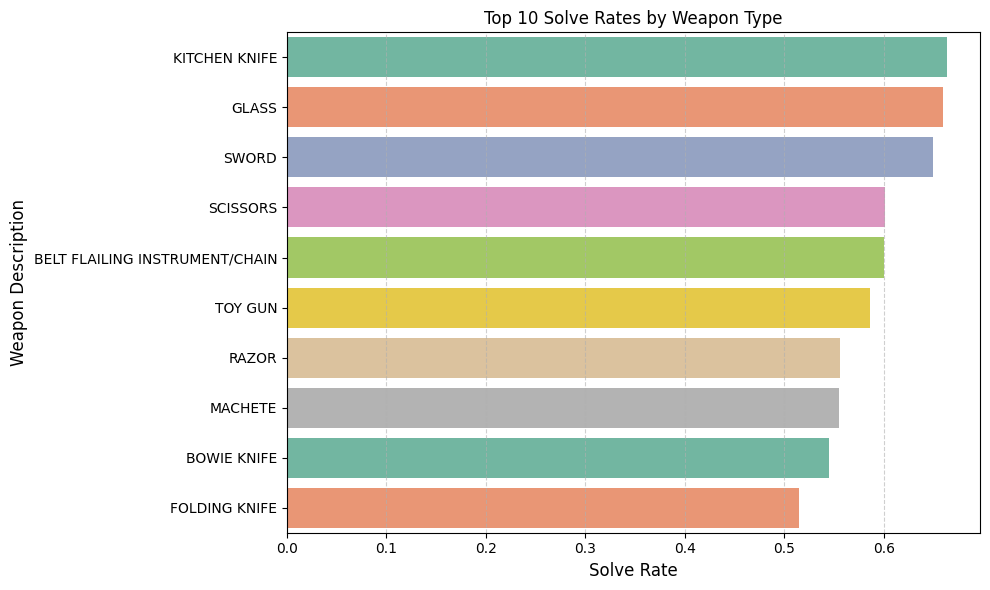

In [ ]:
# Solve rate by Weapon Description chart
plt.figure(figsize=(10, 6))
weapon_solve_rate = df.groupby('weapon_description')['solved'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=weapon_solve_rate.values, y=weapon_solve_rate.index, hue=weapon_solve_rate.index, palette="Set2")
plt.title("Top 10 Solve Rates by Weapon Type")
plt.xlabel("Solve Rate", fontsize=12)
plt.ylabel("Weapon Description", fontsize=12)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

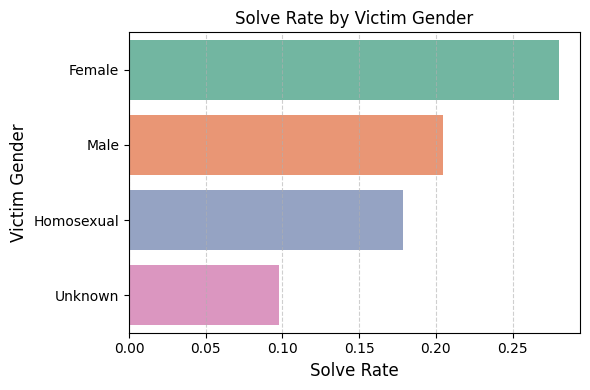

In [ ]:
# Solve rate by Victim Gender
plt.figure(figsize=(6, 4))
gender_solve_rate = df.groupby('victim_gender')['solved'].mean().sort_values(ascending=False)
sns.barplot(x=gender_solve_rate.values, y=gender_solve_rate.index,hue=gender_solve_rate.index, palette="Set2")
plt.title("Solve Rate by Victim Gender")
plt.xlabel("Solve Rate", fontsize = 12)
plt.ylabel("Victim Gender", fontsize = 12)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

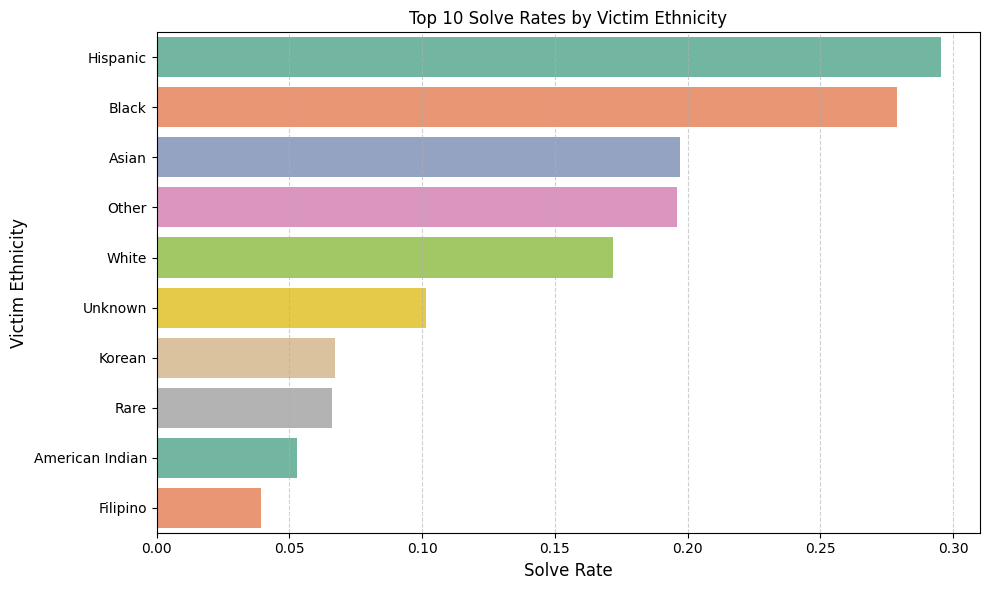

In [ ]:
# Solve rate by Victim Ethnicity
plt.figure(figsize=(10, 6))
ethnicity_solve_rate = df.groupby('victim_ethnicity')['solved'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=ethnicity_solve_rate.values, y=ethnicity_solve_rate.index,hue=ethnicity_solve_rate.index, palette = "Set2")
plt.title("Top 10 Solve Rates by Victim Ethnicity")
plt.xlabel("Solve Rate", fontsize = 12)
plt.ylabel("Victim Ethnicity", fontsize = 12)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


Step 3: Data Visualization

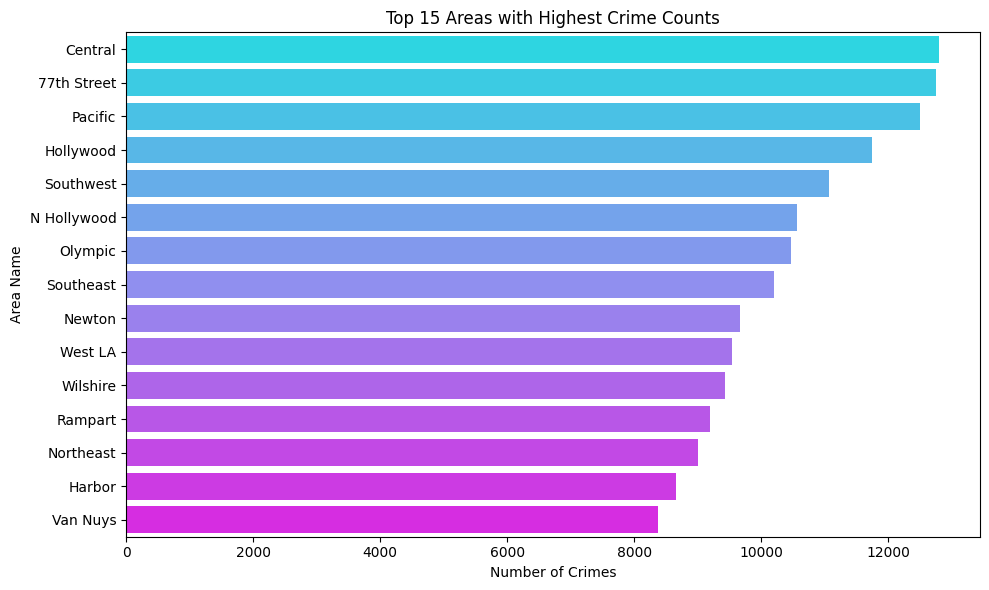

In [ ]:
# --- Distribution of Crimes by Area ---
plt.figure(figsize=(10, 6))
top_areas = df['area_name'].value_counts().head(15)
sns.barplot(x=top_areas.values, y=top_areas.index, hue=top_areas.index, palette='cool')
plt.title('Top 15 Areas with Highest Crime Counts')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.tight_layout()
plt.show()


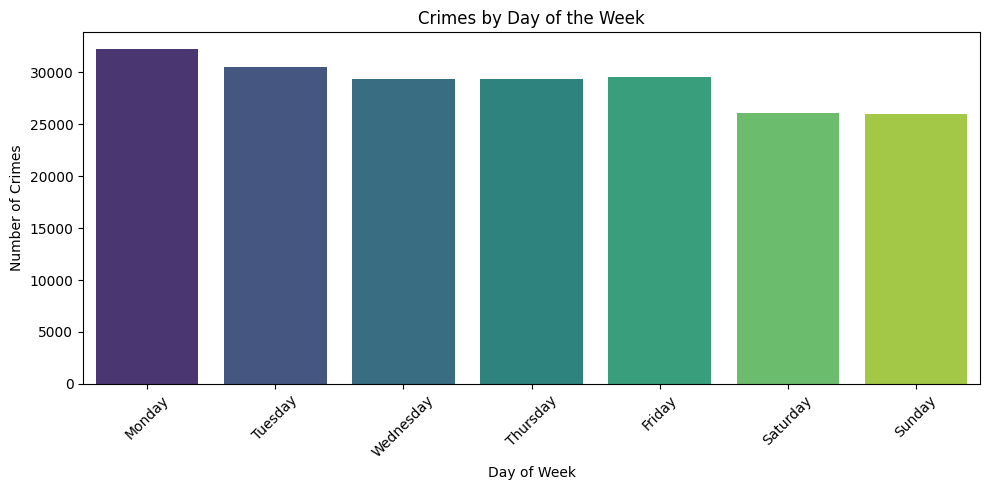

In [ ]:
# Distribution of Crime by Day of Week
# Convert date_reported to datetime
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')
df['day_of_week'] = df['date_reported'].dt.day_name()

plt.figure(figsize=(10, 5))
dow_counts = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
sns.barplot(x=dow_counts.index, y=dow_counts.values,hue=dow_counts.index, palette='viridis')
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

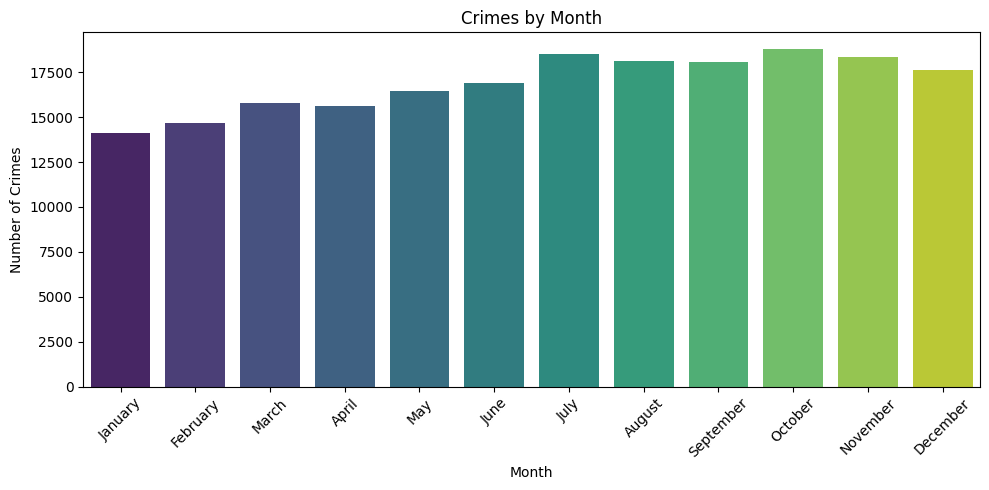

In [ ]:
# Extract month from date_reported
df['month'] = df['date_reported'].dt.month_name()

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['month'].value_counts().reindex(month_order)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values, hue=month_counts.index, palette='viridis', legend=False)
plt.title('Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

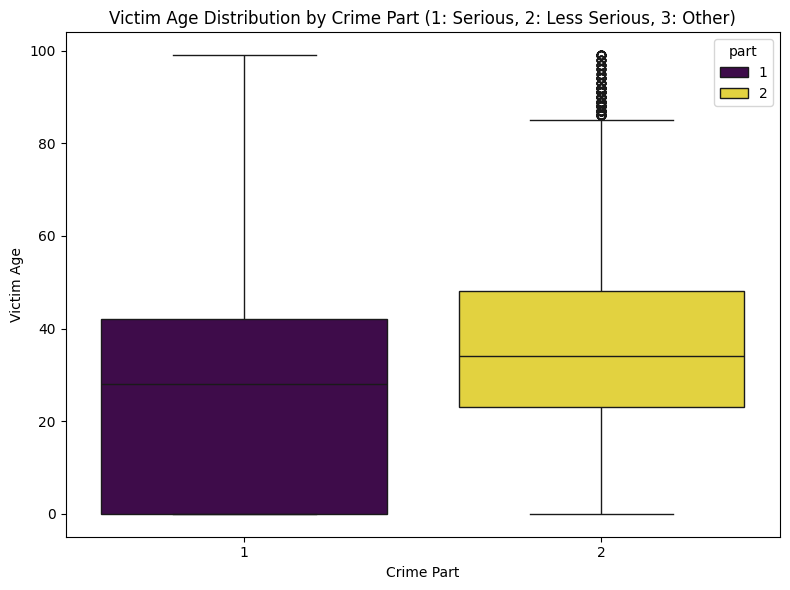

In [ ]:
# Correlation between victim_age and crime_code
plt.figure(figsize=(8, 6))
sns.boxplot(x='part', y='victim_age', data=df,hue= 'part', palette='viridis')
plt.title('Victim Age Distribution by Crime Part (1: Serious, 2: Less Serious, 3: Other)')
plt.xlabel('Crime Part')
plt.ylabel('Victim Age')
plt.tight_layout()
plt.show()

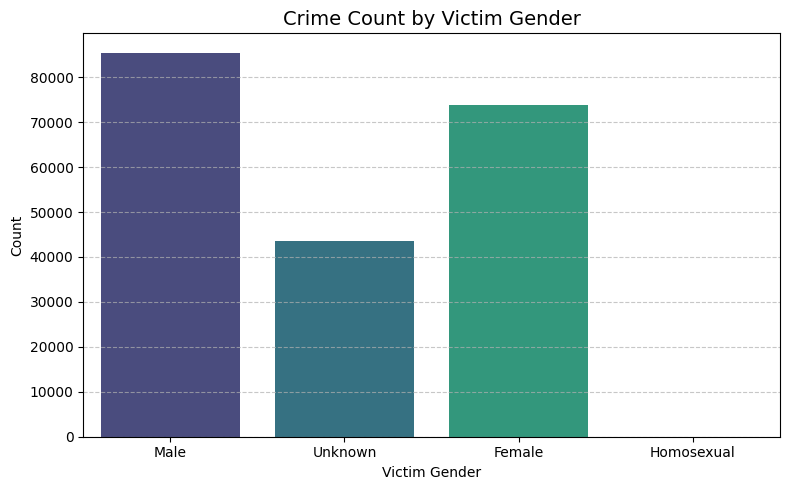

In [ ]:
# Victim Gender Count
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='victim_gender', hue = 'victim_gender', palette="viridis")
plt.title('Crime Count by Victim Gender', fontsize=14)
plt.xlabel('Victim Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

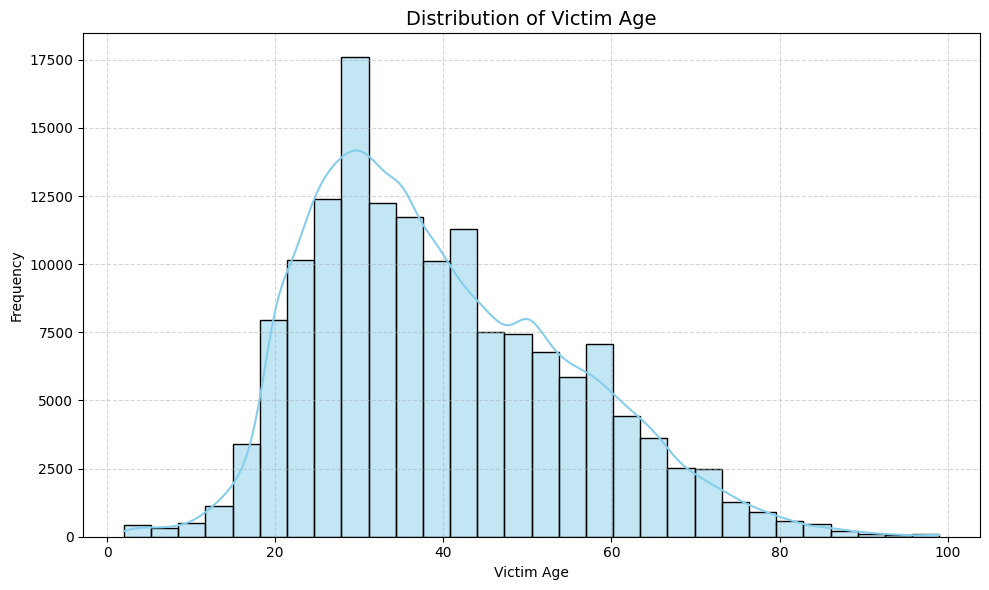

In [ ]:
# Distribution of Victim Age (excluding 0 and NaN)
valid_age_df = df[(df['victim_age'].notna()) & (df['victim_age'] > 0)]
plt.figure(figsize=(10, 6))
sns.histplot(data=valid_age_df, x='victim_age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Victim Age', fontsize=14)
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

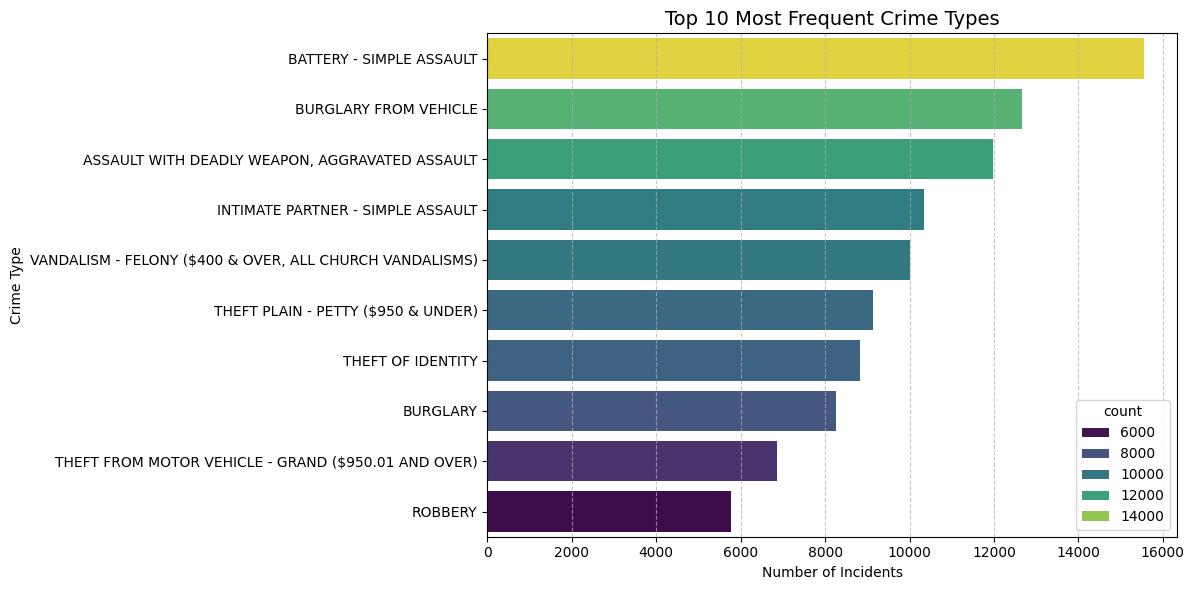

In [ ]:
# Top 10 Most Frequent Crime Types
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='crime_description', data=top_crimes, hue = 'count', palette="viridis")
plt.title('Top 10 Most Frequent Crime Types', fontsize=14)
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

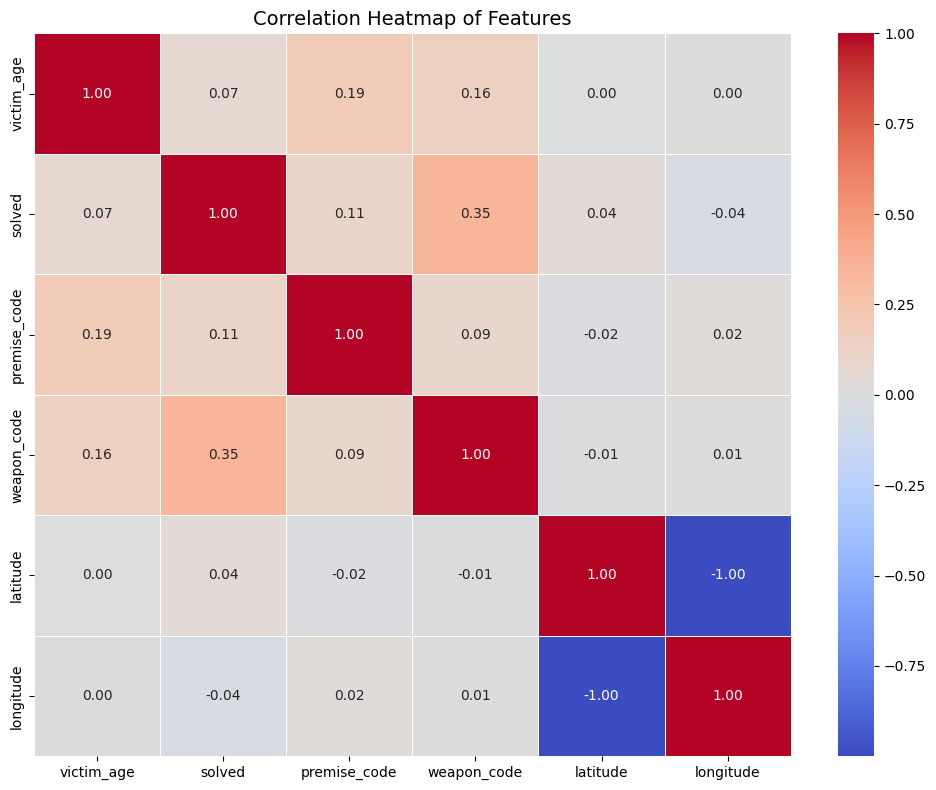

In [ ]:
# Select columns to visualize correlation
correlation_cols = ['victim_age', 'solved',
                    'premise_code', 'weapon_code', 'latitude', 'longitude']
corr_matrix = df[correlation_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.tight_layout()
plt.show()

Step 4: Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Make a copy to preserve original data
new_df = df.copy()

# Ensure proper datetime conversion first
new_df['date_occurred'] = pd.to_datetime(new_df['date_occurred'], errors='coerce')

In [ ]:
# 1. Feature Transformation, temporal features from 'date_occurred'
new_df['year_occurred'] = new_df['date_occurred'].dt.year
new_df['month_occurred'] = new_df['date_occurred'].dt.month
new_df['day_occurred'] = new_df['date_occurred'].dt.day
new_df['hour_occurred'] = new_df['date_occurred'].dt.hour

In [ ]:
# 2. Encode Categorical Variables, label encode 'victim_gender', 'victim_ethnicity', 'case_solved'
le = LabelEncoder()
categorical_cols = ['victim_gender', 'victim_ethnicity', 'case_solved']

for col in categorical_cols:
    new_df[col] = le.fit_transform(new_df[col].astype(str))

In [ ]:
# 3. Normalize/Scale Numerical Features

scaler = MinMaxScaler()
numerical_cols = ['victim_age', 'premise_code', 'weapon_code', 'latitude', 'longitude']

# Apply scaler only on non-null values
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])


In [ ]:
# Check processed data
feature_df_cleaned_preview = new_df[[
    'victim_age', 'victim_gender', 'victim_ethnicity', 'case_solved',
    'year_occurred', 'month_occurred', 'hour_occurred',
    'premise_code', 'weapon_code', 'latitude', 'longitude'
]].head()

# printing the result
feature_df_cleaned_preview.head()

,victim_age,victim_gender,victim_ethnicity,case_solved,year_occurred,month_occurred,hour_occurred,premise_code,weapon_code,latitude,longitude
0,0.323232,2,13,0,2021,6,20,0.728115,0.0,0.989655,0.002175
1,0.000000,3,11,1,2021,1,22,0.104016,0.0,0.984232,0.003340
2,0.000000,3,11,1,2021,1,2,0.104016,0.0,0.991487,0.003663
3,0.292929,2,13,0,2021,8,7,0.105046,0.0,0.991708,0.003430
4,0.000000,3,11,0,2021,11,19,0.104016,0.0,0.989882,0.002234


Step 5: Model Building

In [ ]:
# import necessary modules
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from IPython.display import display

In [ ]:
# Model Training
X = new_df[[
    'victim_age', 'victim_gender', 'victim_ethnicity',
    'year_occurred', 'month_occurred', 'hour_occurred',
    'premise_code', 'weapon_code', 'latitude', 'longitude'
]]
y = new_df['case_solved']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# We used three models to compare
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [ ]:
# Evaluate Models
log_results = {
    "model": "Logistic Regression",
    "accuracy": accuracy_score(y_test, log_preds),
    "confusion_matrix": confusion_matrix(y_test, log_preds),
    "classification_report": classification_report(y_test, log_preds, output_dict=True)
}

rf_results = {
    "model": "Random Forest",
    "accuracy": accuracy_score(y_test, rf_preds),
    "confusion_matrix": confusion_matrix(y_test, rf_preds),
    "classification_report": classification_report(y_test, rf_preds, output_dict=True)
}

dt_results = {
    "model": "Decision Tree",
    "accuracy": accuracy_score(y_test, dt_preds),
    "confusion_matrix": confusion_matrix(y_test, dt_preds),
    "classification_report": classification_report(y_test, dt_preds, output_dict=True)
}

In [ ]:
# Compare results
model_comparison_df = pd.DataFrame([
    {"Model": log_results["model"], "Accuracy": log_results["accuracy"]},
    {"Model": rf_results["model"], "Accuracy": rf_results["accuracy"]},
    {"Model": dt_results["model"], "Accuracy": dt_results["accuracy"]}
])
# print the result
print(model_comparison_df)

                 Model  Accuracy
0  Logistic Regression  0.793047
1        Random Forest  0.824044
2        Decision Tree  0.752991


Step 6: Model Evaluation

In [ ]:
# Evaluate model function
def evaluate_model(name, y_true, y_pred, y_proba=None):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]
    auc = roc_auc_score(y_true, y_proba) if y_proba is not None else None
    return {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc
    }

In [ ]:
# Get predicted probabilities
log_proba = log_model.predict_proba(X_test)[:, 1]
rf_proba = rf_model.predict_proba(X_test)[:, 1]
dt_proba = dt_model.predict_proba(X_test)[:, 1]

# Evaluate all models
log_metrics = evaluate_model("Logistic Regression", y_test, log_preds, log_proba)
rf_metrics = evaluate_model("Random Forest", y_test, rf_preds, rf_proba)
dt_metrics = evaluate_model("Decision Tree", y_test, dt_preds, dt_proba)

# Combine metrics into DataFrame
metrics_df = pd.DataFrame([log_metrics, rf_metrics, dt_metrics])

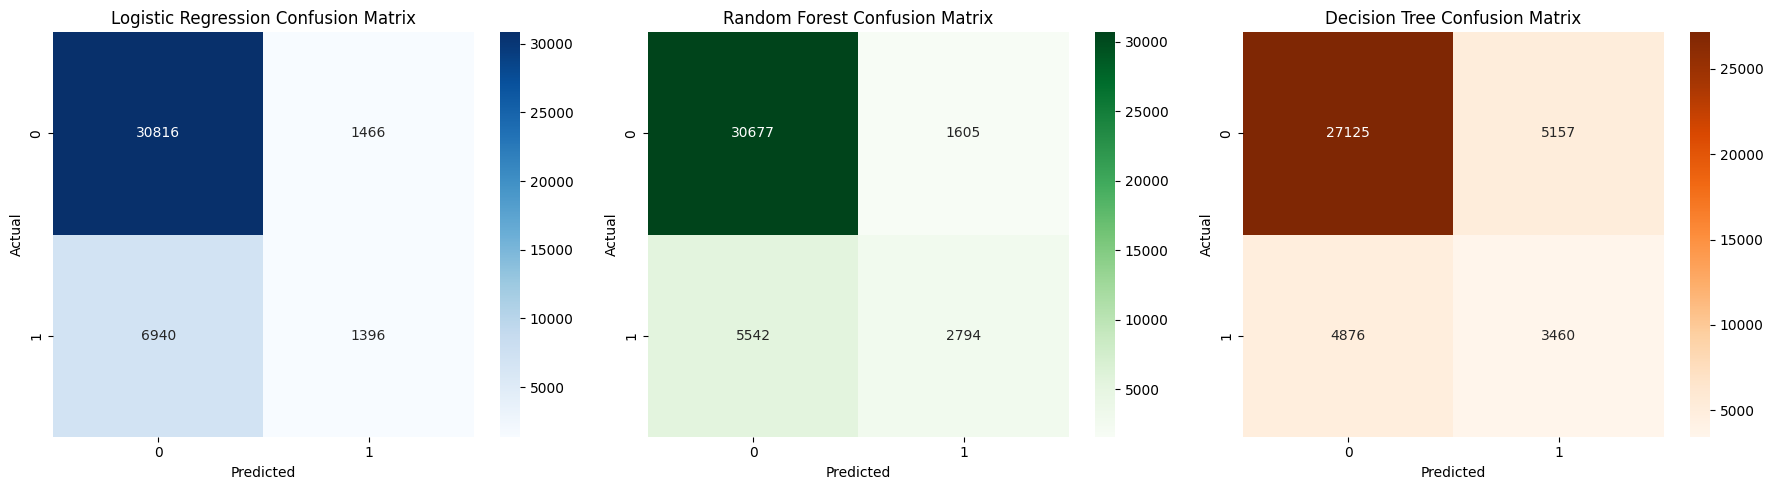

In [ ]:
# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("Decision Tree Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

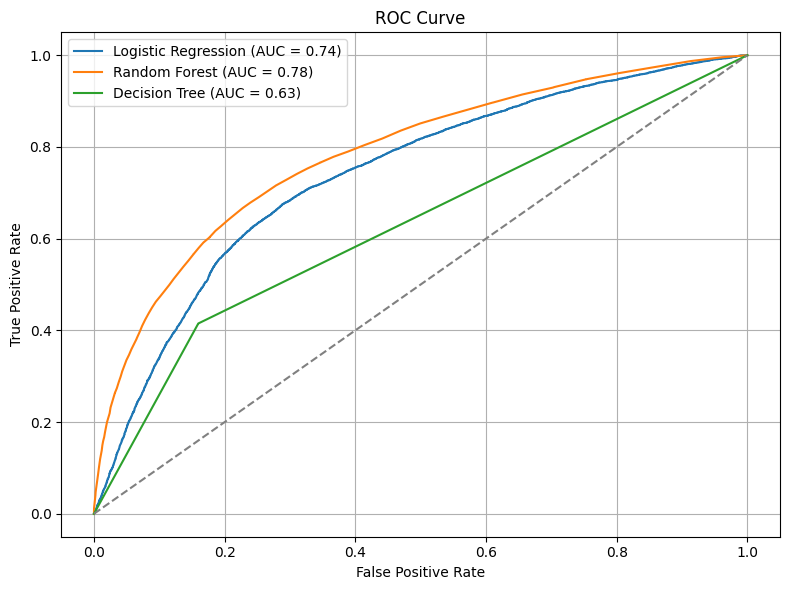

In [ ]:
# Plot ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {log_metrics['AUC-ROC']:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_metrics['AUC-ROC']:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {dt_metrics['AUC-ROC']:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Display metrics table
print("Model Evaluation Metrics")
display(metrics_df)

Model Evaluation Metrics


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.793047,0.487771,0.167466,0.249330,0.739289
1,Random Forest,0.824044,0.635144,0.335173,0.438791,0.784190
2,Decision Tree,0.752991,0.401532,0.415067,0.408187,0.627663
